In [1]:
import pandas as pd
df = pd.read_csv('data.csv')

Trích số từ cột YearsCodePro

In [2]:
df['YearsCodePro'] = df['YearsCodePro'].str.extract(r'(\d+)') 
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')  
max(df['YearsCodePro'])

50.0

In [3]:

df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [4]:
df

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith
0,69804.0,35-44 years old,20,13.0,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",Employed full-time,"['Bash/Shell', 'Go', 'Groovy', 'HTML/CSS', 'Ja...","['Redis', 'SQLite']",['IBM Cloud or Watson'],"['Flask', 'jQuery']","['Docker', 'Git', 'Kubernetes']"
1,144842.0,25-34 years old,10,8.0,Switzerland,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...",['PostgreSQL'],['Amazon Web Services (AWS)'],"['Angular', 'Node.js']","['Docker', 'Gradle', 'Homebrew', 'Kubernetes',..."
2,41363.0,25-34 years old,11,5.0,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Engineer, data",Employed full-time,"['C', 'C++', 'Julia', 'Matlab', 'Python', 'Rus...",[],[],[],[]
3,40814.0,35-44 years old,25,20.0,Germany,"Associate degree (A.A., A.S., etc.)","Developer, full-stack","Employed, full-time;Independent contractor, fr...","['C#', 'GDScript', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],['Microsoft Azure'],"['ASP.NET', 'jQuery']","['Godot', 'MSBuild']"
4,192761.0,35-44 years old,25,15.0,Serbia,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end","Employed, full-time",['Rust'],['PostgreSQL'],['Amazon Web Services (AWS)'],[],"['Cargo', 'npm']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,34692.0,25-34 years old,6,5.0,Poland,Something else,"Developer, front-end","Employed, full-time","['HTML/CSS', 'JavaScript']",[],[],"['Node.js', 'Nuxt.js', 'Vue.js']","['Docker', 'npm', 'Yarn']"
3996,85000.0,25-34 years old,17,9.0,Viet Nam,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end;Developer, desktop or ente...","Employed, full-time;Independent contractor, fr...","['Kotlin', 'SQL', 'Swift']","['MySQL', 'SQLite']","['AWS', 'Firebase', 'Google Cloud']",[],['Homebrew']
3997,80172.0,25-34 years old,8,5.0,Australia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, QA or test;De...",Employed full-time,"['JavaScript', 'Kotlin', 'Node.js', 'Python', ...","['MongoDB', 'PostgreSQL']","['AWS', 'Microsoft Azure']","['jQuery', 'React.js']","['Docker', 'Git', 'Yarn']"
3998,121429.0,35-44 years old,18,10.0,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'JavaScr...","['Elasticsearch', 'MongoDB', 'PostgreSQL', 'Re...",['Amazon Web Services (AWS)'],['Play Framework'],"['Docker', 'Homebrew', 'Kubernetes', 'npm', 'Y..."


# Phân tích và xác định hướng làm

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Mã hóa DevType

In [ ]:
def clean_devtype(value):
    if pd.isnull(value):
        return ["Unknown"]
    return [role.strip() for role in str(value).split(",")]

if 'DevType' in df.columns:
    df['DevType'] = df['DevType'].apply(clean_devtype)
def clean_and_split(devtype_list):
    cleaned_list = []
    for item in devtype_list:
        if isinstance(item, str):
            cleaned_list.extend(item.replace(';', ',').split(','))  # Chuyển ; thành , và tách
    return [x.strip() for x in cleaned_list]  # Xóa khoảng trắng thừa

df['DevType'] = df['DevType'].apply(clean_and_split)


In [7]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer
df = df.reset_index(drop=True)

In [8]:

mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(df['DevType'])

binary_data = pd.DataFrame(binary_matrix, columns=mlb.classes_)

binary_data = binary_data.add_prefix('DevType_')

df = pd.concat([df, binary_data], axis=1).drop(columns=['DevType'])


In [9]:
df

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,DevType_back-end,DevType_data,DevType_desktop or enterprise applications,DevType_embedded applications or devices,DevType_etc.),DevType_front-end,DevType_full-stack,DevType_game or graphics,DevType_mobile,DevType_site reliability
0,69804.0,35-44 years old,20,13.0,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"['Bash/Shell', 'Go', 'Groovy', 'HTML/CSS', 'Ja...","['Redis', 'SQLite']",['IBM Cloud or Watson'],...,1,0,0,0,0,0,0,0,0,0
1,144842.0,25-34 years old,10,8.0,Switzerland,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...",['PostgreSQL'],['Amazon Web Services (AWS)'],...,0,0,0,0,0,0,1,0,0,0
2,41363.0,25-34 years old,11,5.0,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,"['C', 'C++', 'Julia', 'Matlab', 'Python', 'Rus...",[],[],...,0,1,0,0,0,0,0,0,0,0
3,40814.0,35-44 years old,25,20.0,Germany,"Associate degree (A.A., A.S., etc.)","Employed, full-time;Independent contractor, fr...","['C#', 'GDScript', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],['Microsoft Azure'],...,0,0,0,0,0,0,1,0,0,0
4,192761.0,35-44 years old,25,15.0,Serbia,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",['Rust'],['PostgreSQL'],['Amazon Web Services (AWS)'],...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,34692.0,25-34 years old,6,5.0,Poland,Something else,"Employed, full-time","['HTML/CSS', 'JavaScript']",[],[],...,0,0,0,0,0,1,0,0,0,0
3996,85000.0,25-34 years old,17,9.0,Viet Nam,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time;Independent contractor, fr...","['Kotlin', 'SQL', 'Swift']","['MySQL', 'SQLite']","['AWS', 'Firebase', 'Google Cloud']",...,1,0,1,0,0,0,0,0,1,0
3997,80172.0,25-34 years old,8,5.0,Australia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"['JavaScript', 'Kotlin', 'Node.js', 'Python', ...","['MongoDB', 'PostgreSQL']","['AWS', 'Microsoft Azure']",...,0,0,0,0,0,0,1,0,0,0
3998,121429.0,35-44 years old,18,10.0,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'JavaScr...","['Elasticsearch', 'MongoDB', 'PostgreSQL', 'Re...",['Amazon Web Services (AWS)'],...,1,0,0,0,0,0,0,0,0,0


In [10]:
len(df[df['YearsCodePro'].isna()])

20

In [11]:
df = df.dropna(subset=['YearsCodePro'])

In [12]:
df[df['EdLevel'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,DevType_back-end,DevType_data,DevType_desktop or enterprise applications,DevType_embedded applications or devices,DevType_etc.),DevType_front-end,DevType_full-stack,DevType_game or graphics,DevType_mobile,DevType_site reliability


In [13]:
education_keywords = {
    "Bachelor": ["Bachelor", "Undergraduate", "BSc", "BA", "BEng"],
    "Master": ["Master", "MSc", "MA", "MEng", "MBA"],
    "PhD": ["PhD", "Doctoral", "Doctorate"],
    "Associate": ["Associate", "AAS", "AS"],
    "High School": ["High school", "Secondary school", "Highschool", "HS"],
    "Other": []
}

def classify_education_level(ed_level):
    if pd.isnull(ed_level):
        return "Other"
    
    levels_found = []
    for level, keywords in education_keywords.items():
        if any(keyword.lower() in str(ed_level).lower() for keyword in keywords):
            levels_found.append(level)
    
    if "Master" in levels_found:
        return "Master"
    elif "PhD" in levels_found:
        return "PhD"
    elif "Bachelor" in levels_found:
        return "Bachelor"
    elif "Associate" in levels_found:
        return "Associate"
    elif "High School" in levels_found:
        return "High School"
    else:
        return "Other"

df['EdLevelGroup'] = df['EdLevel'].apply(classify_education_level)

df


C:\Users\Admin\AppData\Local\Temp\ipykernel_13772\60138062.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EdLevelGroup'] = df['EdLevel'].apply(classify_education_level)


,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,DevType_data,DevType_desktop or enterprise applications,DevType_embedded applications or devices,DevType_etc.),DevType_front-end,DevType_full-stack,DevType_game or graphics,DevType_mobile,DevType_site reliability,EdLevelGroup
0,69804.0,35-44 years old,20,13.0,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"['Bash/Shell', 'Go', 'Groovy', 'HTML/CSS', 'Ja...","['Redis', 'SQLite']",['IBM Cloud or Watson'],...,0,0,0,0,0,0,0,0,0,Bachelor
1,144842.0,25-34 years old,10,8.0,Switzerland,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...",['PostgreSQL'],['Amazon Web Services (AWS)'],...,0,0,0,0,0,1,0,0,0,Bachelor
2,41363.0,25-34 years old,11,5.0,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,"['C', 'C++', 'Julia', 'Matlab', 'Python', 'Rus...",[],[],...,1,0,0,0,0,0,0,0,0,Master
3,40814.0,35-44 years old,25,20.0,Germany,"Associate degree (A.A., A.S., etc.)","Employed, full-time;Independent contractor, fr...","['C#', 'GDScript', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],['Microsoft Azure'],...,0,0,0,0,0,1,0,0,0,Associate
4,192761.0,35-44 years old,25,15.0,Serbia,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",['Rust'],['PostgreSQL'],['Amazon Web Services (AWS)'],...,0,0,0,0,0,0,0,0,0,Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,34692.0,25-34 years old,6,5.0,Poland,Something else,"Employed, full-time","['HTML/CSS', 'JavaScript']",[],[],...,0,0,0,0,1,0,0,0,0,Other
3996,85000.0,25-34 years old,17,9.0,Viet Nam,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time;Independent contractor, fr...","['Kotlin', 'SQL', 'Swift']","['MySQL', 'SQLite']","['AWS', 'Firebase', 'Google Cloud']",...,0,1,0,0,0,0,0,1,0,Master
3997,80172.0,25-34 years old,8,5.0,Australia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"['JavaScript', 'Kotlin', 'Node.js', 'Python', ...","['MongoDB', 'PostgreSQL']","['AWS', 'Microsoft Azure']",...,0,0,0,0,0,1,0,0,0,Bachelor
3998,121429.0,35-44 years old,18,10.0,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'JavaScr...","['Elasticsearch', 'MongoDB', 'PostgreSQL', 'Re...",['Amazon Web Services (AWS)'],...,0,0,0,0,0,0,0,0,0,Bachelor


In [14]:
df[df['Country'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,DevType_data,DevType_desktop or enterprise applications,DevType_embedded applications or devices,DevType_etc.),DevType_front-end,DevType_full-stack,DevType_game or graphics,DevType_mobile,DevType_site reliability,EdLevelGroup


In [15]:
df[df['Employment'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,DevType_data,DevType_desktop or enterprise applications,DevType_embedded applications or devices,DevType_etc.),DevType_front-end,DevType_full-stack,DevType_game or graphics,DevType_mobile,DevType_site reliability,EdLevelGroup


In [16]:
df.dtypes

ConvertedCompYearly                                      float64
Age                                                       object
YearsCode                                                 object
YearsCodePro                                             float64
Country                                                   object
EdLevel                                                   object
Employment                                                object
LanguageHaveWorkedWith                                    object
DatabaseHaveWorkedWith                                    object
PlatformHaveWorkedWith                                    object
WebframeHaveWorkedWith                                    object
ToolsTechHaveWorkedWith                                   object
DevType_AI                                                 int32
DevType_Academic researcher                                int32
DevType_Blockchain                                         int32
DevType_Cloud infrastruct

In [17]:
data = df

In [18]:
data.isnull().sum()

ConvertedCompYearly                                      0
Age                                                      8
YearsCode                                                4
YearsCodePro                                             0
Country                                                  0
EdLevel                                                  0
Employment                                               0
LanguageHaveWorkedWith                                   0
DatabaseHaveWorkedWith                                   0
PlatformHaveWorkedWith                                   0
WebframeHaveWorkedWith                                   0
ToolsTechHaveWorkedWith                                  0
DevType_AI                                               0
DevType_Academic researcher                              0
DevType_Blockchain                                       0
DevType_Cloud infrastructure engineer                    0
DevType_Data engineer                                   

In [19]:
data = data.reset_index(drop = True)

In [20]:
import re

def extract_average_age(age_str):
    if isinstance(age_str, str):
        match = re.match(r'(\d+)-(\d+)', age_str)
        if match:
            lower, upper = map(int, match.groups())
            if ((lower + upper)/2) %2==0 :
                return ((lower + upper) / 2)
            else:
                return (lower+upper)/2+0.5
    return None 

data['Age'] = data['Age'].apply(extract_average_age)


In [21]:
data = data.dropna()

In [22]:
data['YearsCode'] = data['YearsCode'].str.extract(r'(\d+)') 
data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')  

In [23]:
education_mapping = {
    'Other': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

data['EdLevelGroup'] = data['EdLevelGroup'].map(education_mapping)

In [24]:
data

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,DevType_data,DevType_desktop or enterprise applications,DevType_embedded applications or devices,DevType_etc.),DevType_front-end,DevType_full-stack,DevType_game or graphics,DevType_mobile,DevType_site reliability,EdLevelGroup
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"['Bash/Shell', 'Go', 'Groovy', 'HTML/CSS', 'Ja...","['Redis', 'SQLite']",['IBM Cloud or Watson'],...,0,0,0,0,0,0,0,0,0,2
1,144842.0,30.0,10,8.0,Switzerland,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...",['PostgreSQL'],['Amazon Web Services (AWS)'],...,0,0,0,0,0,1,0,0,0,2
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,"['C', 'C++', 'Julia', 'Matlab', 'Python', 'Rus...",[],[],...,1,0,0,0,0,0,0,0,0,3
3,40814.0,40.0,25,20.0,Germany,"Associate degree (A.A., A.S., etc.)","Employed, full-time;Independent contractor, fr...","['C#', 'GDScript', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],['Microsoft Azure'],...,0,0,0,0,0,1,0,0,0,1
4,192761.0,40.0,25,15.0,Serbia,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",['Rust'],['PostgreSQL'],['Amazon Web Services (AWS)'],...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,34692.0,30.0,6,5.0,Poland,Something else,"Employed, full-time","['HTML/CSS', 'JavaScript']",[],[],...,0,0,0,0,1,0,0,0,0,0
3976,85000.0,30.0,17,9.0,Viet Nam,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time;Independent contractor, fr...","['Kotlin', 'SQL', 'Swift']","['MySQL', 'SQLite']","['AWS', 'Firebase', 'Google Cloud']",...,0,1,0,0,0,0,0,1,0,3
3977,80172.0,30.0,8,5.0,Australia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"['JavaScript', 'Kotlin', 'Node.js', 'Python', ...","['MongoDB', 'PostgreSQL']","['AWS', 'Microsoft Azure']",...,0,0,0,0,0,1,0,0,0,2
3978,121429.0,40.0,18,10.0,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'JavaScr...","['Elasticsearch', 'MongoDB', 'PostgreSQL', 'Re...",['Amazon Web Services (AWS)'],...,0,0,0,0,0,0,0,0,0,2


In [25]:

data = data.rename(columns={'ConvertedCompYearly': 'Salary'})
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
if lower_bound < 12000:
    lower_bound = 12000

In [26]:
data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]


In [27]:

# data['DevGroup'] = data['DevGroup'].apply(lambda x: ', '.join(x))

# outliers_mask = (data['Salary'] < lower_bound) | (data['Salary'] > upper_bound)

# data = data[~outliers_mask]



In [28]:

invalid_experience = (data['YearsCode'] > data['Age'] - 15) | \
                     (data['YearsCode'] < 0) | \
                     (data['YearsCode'] > 50)|\
                    (data['YearsCodePro'] > data['YearsCode'])

print(f"Số hàng bất hợp lý trong YearsCodePro: {invalid_experience.sum()}")
data = data[~invalid_experience]

Số hàng bất hợp lý trong YearsCodePro: 669


Đã thử dùng median, lr cho dự đoán YearsCodePro nhưng kết quả đều tệ hơn là bỏ trực tiếp

In [29]:
data = data.reset_index(drop=True)

In [30]:
# Combine all relevant columns into a single 'skills' column
skills_columns = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "WebframeHaveWorkedWith",
]

# Remove 'NaN' and combine lists while deduplicating
def combine_skills(row):
    combined = []
    for col in skills_columns:
        if pd.notna(row[col]):  # Check if the column is not NaN
            combined.extend(eval(row[col]))  # Convert string representation of lists to actual lists
    return list(set(combined))  # Remove duplicates

data["skills"] = data.apply(combine_skills, axis=1)

data


,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,DevType_desktop or enterprise applications,DevType_embedded applications or devices,DevType_etc.),DevType_front-end,DevType_full-stack,DevType_game or graphics,DevType_mobile,DevType_site reliability,EdLevelGroup,skills
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"['Bash/Shell', 'Go', 'Groovy', 'HTML/CSS', 'Ja...","['Redis', 'SQLite']",['IBM Cloud or Watson'],...,0,0,0,0,0,0,0,0,2,"[HTML/CSS, Redis, SQLite, IBM Cloud or Watson,..."
1,144842.0,30.0,10,8.0,Switzerland,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...",['PostgreSQL'],['Amazon Web Services (AWS)'],...,0,0,0,0,1,0,0,0,2,"[Groovy, Kotlin, Homebrew, JavaScript, Postgre..."
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,"['C', 'C++', 'Julia', 'Matlab', 'Python', 'Rus...",[],[],...,0,0,0,0,0,0,0,0,3,"[Rust, C, Matlab, VBA, Python, Julia, C++]"
3,40814.0,40.0,25,20.0,Germany,"Associate degree (A.A., A.S., etc.)","Employed, full-time;Independent contractor, fr...","['C#', 'GDScript', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],['Microsoft Azure'],...,0,0,0,0,1,0,0,0,1,"[HTML/CSS, PowerShell, MSBuild, Microsoft Azur..."
4,192761.0,40.0,25,15.0,Serbia,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",['Rust'],['PostgreSQL'],['Amazon Web Services (AWS)'],...,0,0,0,0,0,0,0,0,3,"[PostgreSQL, Rust, npm, Cargo, Amazon Web Serv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,74651.0,40.0,18,12.0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time","['Java', 'JavaScript', 'SQL']",['IBM DB2'],[],...,0,0,0,1,1,0,0,0,3,"[npm, SQL, IBM DB2, Node.js, Vue.js, jQuery, U..."
2660,34692.0,30.0,6,5.0,Poland,Something else,"Employed, full-time","['HTML/CSS', 'JavaScript']",[],[],...,0,0,0,1,0,0,0,0,0,"[HTML/CSS, Yarn, npm, Node.js, Vue.js, JavaScr..."
2661,80172.0,30.0,8,5.0,Australia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"['JavaScript', 'Kotlin', 'Node.js', 'Python', ...","['MongoDB', 'PostgreSQL']","['AWS', 'Microsoft Azure']",...,0,0,0,0,1,0,0,0,2,"[PostgreSQL, TypeScript, AWS, Microsoft Azure,..."
2662,121429.0,40.0,18,10.0,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'JavaScr...","['Elasticsearch', 'MongoDB', 'PostgreSQL', 'Re...",['Amazon Web Services (AWS)'],...,0,0,0,0,0,0,0,0,2,"[Elasticsearch, Redis, SQLite, PostgreSQL, Typ..."


In [31]:
data['Employment'] = data['Employment'].str.replace(',', ';').str.replace(' ', '').str.strip()

data['Employment'] = data['Employment'].str.split(';')

# Áp dụng MultiLabelBinarizer
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(data['Employment'])

# Tạo DataFrame từ kết quả đã mã hóa
encoded_data = pd.DataFrame(encoded, columns=mlb.classes_)

# Gộp lại với DataFrame ban đầu
data = pd.concat([data, encoded_data], axis=1)


In [32]:
data = data.drop(columns=[ 'EdLevel', 'Employment', 'LanguageHaveWorkedWith'], axis=1)


In [33]:
data = data.drop(columns=['DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith'], axis=1)


In [34]:
data=  data.reset_index(drop=True)

In [35]:
data

,Salary,Age,YearsCode,YearsCodePro,Country,DevType_AI,DevType_Academic researcher,DevType_Blockchain,DevType_Cloud infrastructure engineer,DevType_Data engineer,...,Employedfull-time,Employedpart-time,Independentcontractor,Notemployed,Student,butlookingforwork,freelancer,full-time,orself-employed,part-time
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,144842.0,30.0,10,8.0,Switzerland,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,40814.0,40.0,25,20.0,Germany,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
4,192761.0,40.0,25,15.0,Serbia,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,74651.0,40.0,18,12.0,Germany,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2660,34692.0,30.0,6,5.0,Poland,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2661,80172.0,30.0,8,5.0,Australia,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2662,121429.0,40.0,18,10.0,Israel,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer
data['skills'] = data['skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
skills_encoded_train = mlb.fit_transform(data['skills'])
skills_df_train = pd.DataFrame(skills_encoded_train, columns=mlb.classes_)


In [37]:
data = pd.concat([data.drop(columns=['skills']), skills_df_train], axis=1)

In [38]:
data

,Salary,Age,YearsCode,YearsCodePro,Country,DevType_AI,DevType_Academic researcher,DevType_Blockchain,DevType_Cloud infrastructure engineer,DevType_Data engineer,...,Xamarin,Yarn,Yii 2,Zig,bandit,cppunit,doctest,jQuery,npm,pnpm
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,144842.0,30.0,10,8.0,Switzerland,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40814.0,40.0,25,20.0,Germany,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,192761.0,40.0,25,15.0,Serbia,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,74651.0,40.0,18,12.0,Germany,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2660,34692.0,30.0,6,5.0,Poland,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2661,80172.0,30.0,8,5.0,Australia,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2662,121429.0,40.0,18,10.0,Israel,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [39]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

data_encoded = encoder.fit_transform(data[['Country']])

data_encoded_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(['Country']))

data = pd.concat([data, data_encoded_df], axis=1)

# train_data = train_data.drop(columns=['Country'])
# val_data = val_data.drop(columns=['Country'])



In [40]:
data = data.drop('Country',axis=1)

In [41]:
data

,Salary,Age,YearsCode,YearsCodePro,DevType_AI,DevType_Academic researcher,DevType_Blockchain,DevType_Cloud infrastructure engineer,DevType_Data engineer,DevType_Data or business analyst,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Zimbabwe
0,69804.0,40.0,20,13.0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,144842.0,30.0,10,8.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41363.0,30.0,11,5.0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40814.0,40.0,25,20.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192761.0,40.0,25,15.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,74651.0,40.0,18,12.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2660,34692.0,30.0,6,5.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2661,80172.0,30.0,8,5.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2662,121429.0,40.0,18,10.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Chia thành tập train, kiểm thử và val rồi xử lý các giá trị ngoại lai bằng trung vị...

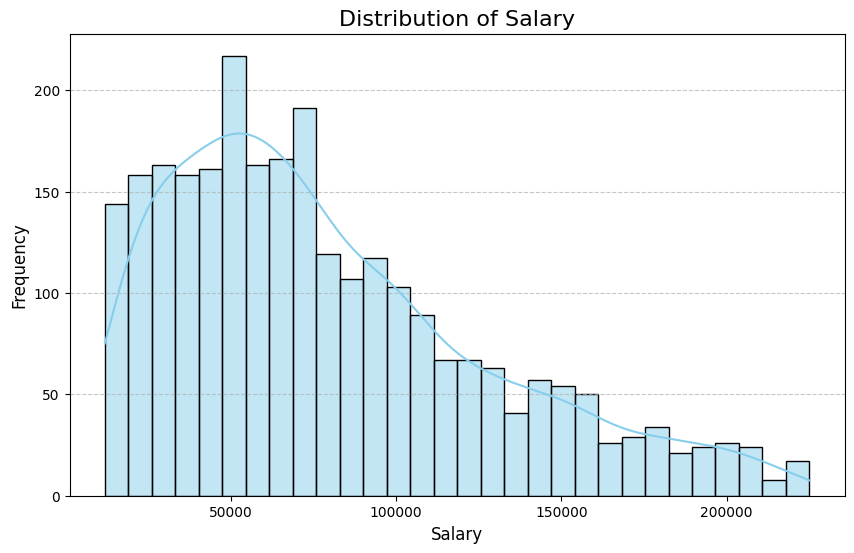

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13772\3548073148.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['EdLevelGroup'], y=data['Salary'], ax=axes[1], palette='viridis')


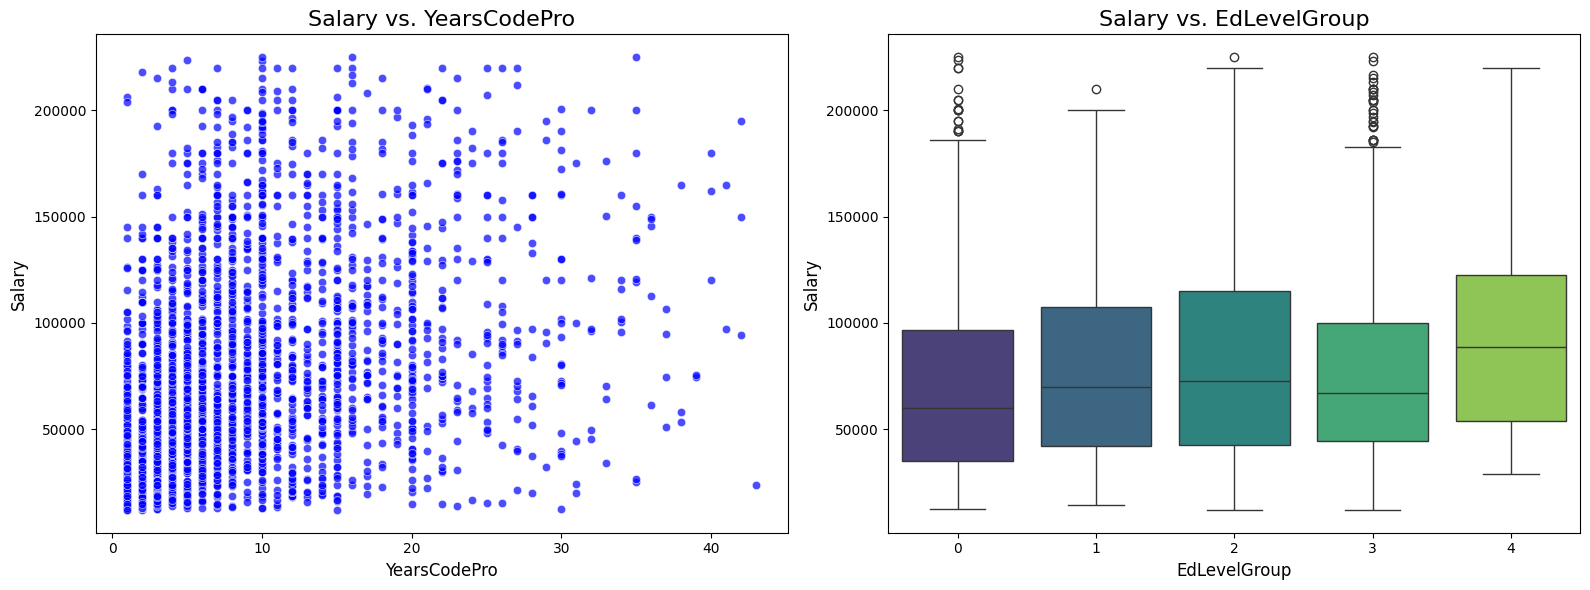

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=data['YearsCodePro'], y=data['Salary'], ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Salary vs. YearsCodePro', fontsize=16)
axes[0].set_xlabel('YearsCodePro', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)
sns.boxplot(x=data['EdLevelGroup'], y=data['Salary'], ax=axes[1], palette='viridis')
axes[1].set_title('Salary vs. EdLevelGroup', fontsize=16)
axes[1].set_xlabel('EdLevelGroup', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()


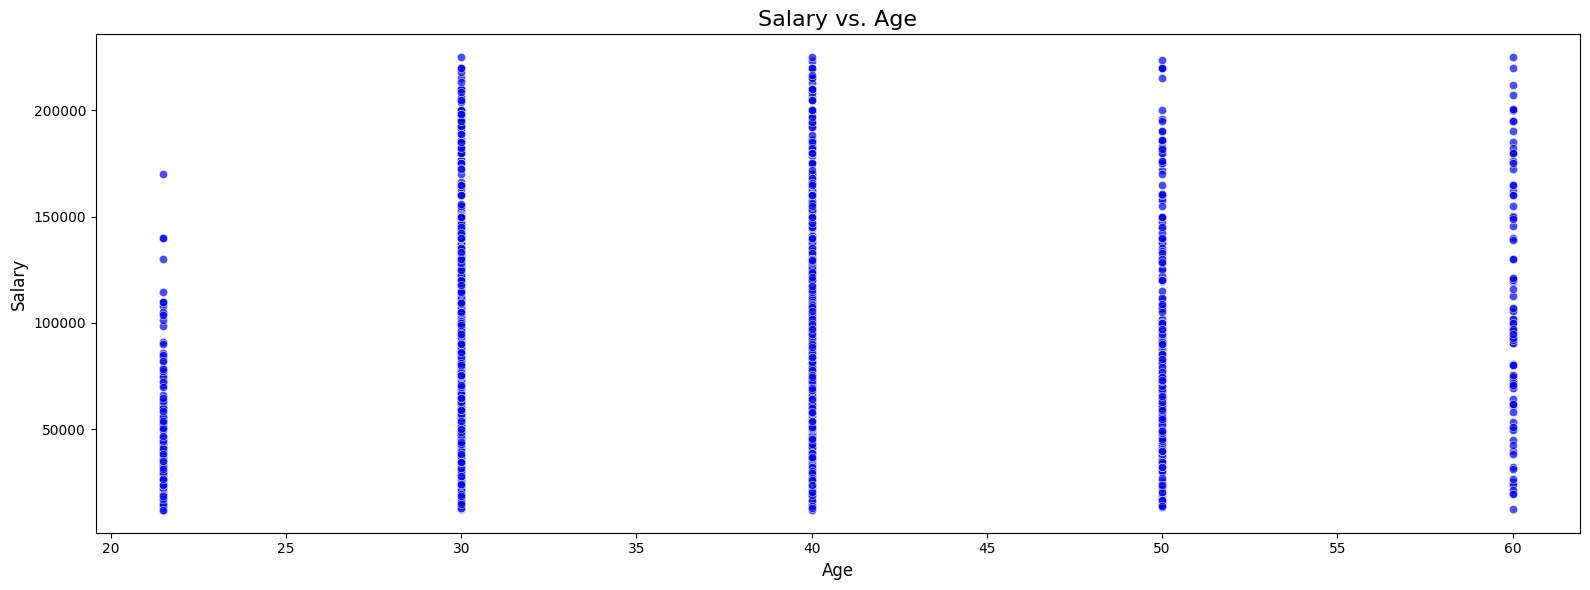

In [44]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
sns.scatterplot(x=data['Age'], y=data['Salary'], color='blue', alpha=0.7)
axes.set_title('Salary vs. Age', fontsize=16)
axes.set_xlabel('Age', fontsize=12)
axes.set_ylabel('Salary', fontsize=12)
plt.tight_layout()
plt.show()


In [45]:
# from sklearn.ensemble import RandomForestRegressor
# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(data.drop('Salary', axis=1), data['Salary'])

# feature_importances = pd.Series(rf_model.feature_importances_, index=df_dropped.drop('Salary', axis=1).columns)

# feature_importances_sorted = feature_importances.sort_values(ascending=False)

# plt.figure(figsize=(10, 6))
# feature_importances_sorted[:10].plot(kind='barh', color='orange')  # Hiển thị top 10
# plt.title("Top Features by Importance from RandomForest")
# plt.xlabel("Feature Importance")
# plt.ylabel("Features")
# plt.show()


In [46]:
# correlations = data.corr()['Salary'].abs()
# sorted_correlations = correlations.sort_values()
# num_cols_to_drop = int(0.8* len(data.columns))
# cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
# df_dropped = data.drop(cols_to_drop,axis=1)

In [47]:
# import matplotlib.pyplot as plt

# # Lấy tương quan của các đặc trưng quan trọng
# important_correlations = sorted_correlations[-(len(data.columns) - num_cols_to_drop):]

# # Vẽ biểu đồ
# plt.figure(figsize=(12, 10))
# important_correlations.plot(kind='barh', color='skyblue')
# plt.title("Top 20% Features by Correlation with Salary")
# plt.xlabel("Absolute Correlation")
# plt.ylabel("Features")
# plt.show()


In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

X = data.drop(columns=['EdLevelGroup'])  
y = data['EdLevelGroup'] 

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, temp_idx in splitter.split(X, y):
    train_data = data.iloc[train_idx]
    temp_data = data.iloc[temp_idx]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, real_idx in splitter.split(temp_data.drop(columns=['EdLevelGroup']), temp_data['EdLevelGroup']):
    val_data = temp_data.iloc[val_idx]
    real_data = temp_data.iloc[real_idx]

print(f"Kích thước train: {len(train_data)}")
print(f"Kích thước val: {len(val_data)}")
print(f"Kích thước realval: {len(real_data)}")


Kích thước train: 2131
Kích thước val: 266
Kích thước realval: 267


In [49]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)

In [50]:
train_data['YearsCode']

0       12
1       10
2       15
3       13
4        6
        ..
2126     5
2127     9
2128    15
2129    11
2130    12
Name: YearsCode, Length: 2131, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[['YearsCodePro']] = scaler.fit_transform(train_data[['YearsCodePro']])
val_data[['YearsCodePro']] = scaler.transform(val_data[['YearsCodePro']])

train_data[['YearsCode']] = scaler.fit_transform(train_data[['YearsCode']])
val_data[['YearsCode']] = scaler.transform(val_data[['YearsCode']])

In [52]:
data.isnull().sum()

Salary                                          0
Age                                             0
YearsCode                                       0
YearsCodePro                                    0
DevType_AI                                      0
                                               ..
Country_Uruguay                                 0
Country_Uzbekistan                              0
Country_Venezuela, Bolivarian Republic of...    0
Country_Viet Nam                                0
Country_Zimbabwe                                0
Length: 377, dtype: int64

In [53]:
X_val = val_data.drop('Salary',axis=1)
y_val = val_data['Salary']

In [54]:
X_train = train_data.drop('Salary',axis=1)
y_train = train_data['Salary']

In [55]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

In [56]:
X_train

,Age,YearsCode,YearsCodePro,DevType_AI,DevType_Academic researcher,DevType_Blockchain,DevType_Cloud infrastructure engineer,DevType_Data engineer,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Zimbabwe
0,30.0,-0.201215,0.086182,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.0,-0.442109,0.086182,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.0,0.160124,0.086182,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,30.0,-0.080769,-0.318640,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.5,-0.923895,-0.993345,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,30.0,-1.044341,-0.858404,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2127,30.0,-0.562555,-0.453581,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2128,40.0,0.160124,-0.048759,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2129,40.0,-0.321662,-0.453581,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Random forest

In [58]:
train_data.to_csv('train.csv',index=False)

In [59]:
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=15,random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_val)

print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R²:", r2_score(y_val, y_pred))


KeyboardInterrupt: 

In [ ]:
# rf_model = RandomForestRegressor(n_estimators=1000, max_depth=15,random_state=42)

# rf_model.fit(X_train_resampled, y_train_resampled)


# y_pred = rf_model.predict(X_val)

# print("MAE:", mean_absolute_error(y_val, y_pred))
# print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
# print("R²:", r2_score(y_val, y_pred))


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# rf_model = RandomForestRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(
#     estimator=rf_model,
#     param_grid=param_grid,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     verbose=2
# )
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)

# best_rf_model = grid_search.best_estimator_
# y_pred = best_rf_model.predict(X_val)

# mae = mean_absolute_error(y_val, y_pred)
# rmse = mean_squared_error(y_val, y_pred, squared=False)
# r2 = r2_score(y_val, y_pred)

# print(f"MAE: {mae}")
# print(f"RMSE: {rmse}")
# print(f"R²: {r2}")


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=900, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 23339.435628375846
RMSE: 32664.178037945414
R²: 0.5579086141741622


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
svr = SVR(kernel = "rbf", C =2000000,epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 23057.018130506498
RMSE: 32166.827915607922
R²: 0.5712688330813669


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

svr = SVR(kernel="rbf")

param_grid = {
    'C': [1, 10, 100, 1000, 10000, 1000000],
    'epsilon': [0.01, 0.05, 0.1, 0.5, 1],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Fitting 5 folds for each of 150 candidates, totalling 750 fits


KeyboardInterrupt: 

# Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 8740253998.54252
RMSE: 100797240430.21436
R²: -4209842705850.9106


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Linear Regression + Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
lr = LinearRegression()
bagging_regressor = BaggingRegressor(estimator=lr, n_estimators=200, random_state=42)

bagging_regressor.fit(X_train, y_train)
y_pred = bagging_regressor.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 1794873748578.2334
RMSE: 8610511478065.538
R²: -3.072037300753425e+16


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# LGBMRegressor

In [63]:
import lightgbm as lgb
X_train_temp = X_train
X_val_temp = X_val
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=1300,learning_rate=0.05,max_depth=2,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)

mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"R²: {r2_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 2131, number of used features: 207
[LightGBM] [Info] Start training from score 79823.407790
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 800),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 15, 127),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    }
    model = lgb.LGBMRegressor(**params, random_state=42)
    score = -cross_val_score(model, X_train_temp, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return np.sqrt(score) 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
print("Best RMSE:", study.best_value)


ModuleNotFoundError: No module named 'optuna'

In [ ]:
import lightgbm as lgb
best_params = study.best_params
best_model = lgb.LGBMRegressor(**best_params, random_state=42)
best_model.fit(X_train_temp, y_train)

y_pred = best_model.predict(X_val_temp)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


NameError: name 'study' is not defined

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import lightgbm as lgb

param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10, -1],
    'num_leaves': [15, 31, 63, 127],
    'min_child_samples': [5, 10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

lgb_model = lgb.LGBMRegressor(random_state=42)

random_search = RandomizedSearchCV(
    lgb_model, param_distributions=param_dist, n_iter=30, 
    scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1
)
random_search.fit(X_train_temp, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best RMSE:", np.sqrt(-random_search.best_score_))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 1704, number of used features: 149
[LightGBM] [Info] Start training from score 78809.777582
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [ ]:
best_params = study.best_params
best_model = lgb.LGBMRegressor(**best_params, random_state=42)
best_model.fit(X_train_temp, y_train)

y_pred = best_model.predict(X_val_temp)


mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 2131, number of used features: 205
[LightGBM] [Info] Start training from score 78856.888315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

# SVR

In [ ]:
svr = SVR(kernel = "rbf", C =2000000, epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 23057.018130506498
RMSE: 32166.827915607922
R²: 0.5712688330813669


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
lr_model = LinearRegression()
svr_model = SVR(kernel='rbf', C=1500000, epsilon=0.03)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 23316.87939471039
RMSE: 32236.99916215002
R²: 0.569396257087921


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('gbm', gbm_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 22252.48731549083
RMSE: 31001.12900937886
R²: 0.6017795072563814


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


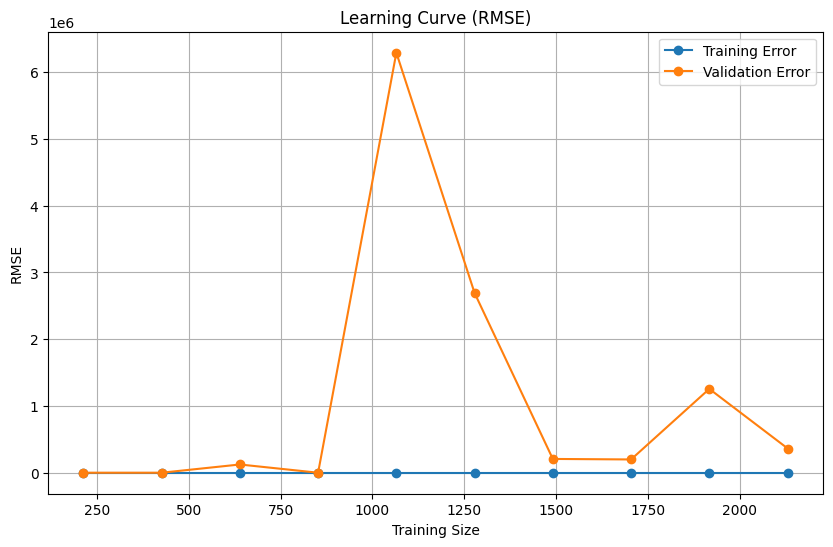

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
val_scores_mean = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
plt.plot(train_sizes, val_scores_mean, label="Validation Error", marker='o')
plt.title("Learning Curve (RMSE)")
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=700, learning_rate=0.05, max_depth=3)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('xgb', xgb_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 22344.48399203613
RMSE: 31254.951597223517
R²: 0.5952319300521821


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=700, learning_rate=0.05,max_depth=7, num_leaves=35)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('lgb', lgb_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 2131, number of used features: 207
[LightGBM] [Info] Start training from score 79823.407790
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(iterations=1200, learning_rate=0.05, depth=3, silent=True)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('catboost', catboost_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 22415.06040978334
RMSE: 31209.603322742012
R²: 0.5964056459878396


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
bagging_svr = BaggingRegressor(
    estimator=svr,    
    n_estimators=300,       
    max_samples=0.8,       
    max_features=0.8,      
    random_state=42,
    n_jobs=-1              
)

bagging_svr.fit(X_train, y_train)

y_pred = bagging_svr.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

# XGBoost

In [ ]:
from xgboost import XGBRegressor
xgb_best = XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=700,
    subsample=0.8,
    random_state=42
)
xgb_best.fit(X_train, y_train)

y_pred = xgb_best.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 22318.049643150847
RMSE: 30894.608874581132
R²: 0.6045113835951219


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Random forest + xgb**

In [ ]:
xgb = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=700,
    subsample=0.5,
    random_state=42
)

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=3,
    random_state=42
)

meta_model = Ridge(alpha=0.1)

stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('rf', rf)
    ],
    final_estimator=meta_model
)

stacking_regressor.fit(X_train, y_train)

y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 20567.30929238837
RMSE: 27642.460937888565
R²: 0.6712648514448758


**Average of xgb and gb**

In [ ]:

weight_xgb = 0.8
weight_gb = 0.2

xgb_best.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

y_pred_xgb = xgb_best.predict(X_val)
y_pred_gb = gb_model.predict(X_val)

y_pred_weighted = (weight_xgb * y_pred_xgb + weight_gb * y_pred_gb)

mae_weighted = mean_absolute_error(y_val, y_pred_weighted)
rmse_weighted = mean_squared_error(y_val, y_pred_weighted, squared=False)
r2_weighted = r2_score(y_val, y_pred_weighted)

print("Combined Model (Weighted Averaging):")
print(f"MAE: {mae_weighted}")
print(f"RMSE: {rmse_weighted}")
print(f"R²: {r2_weighted}")


Combined Model (Weighted Averaging):
MAE: 20999.296959875974
RMSE: 28013.634544609296
R²: 0.6623772912564403


# CatBoostRegressor

In [ ]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 20845.077561290138
RMSE: 28074.70744001994
R²: 0.6609035751005479


# Kết hợp tất 

In [ ]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
)
lr = LinearRegression()
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
dt = DecisionTreeRegressor(max_depth = 3, random_state = 42)
lgb = LGBMRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 5, random_state= 42)
catboost = CatBoostRegressor(n_estimators=500, learning_rate=0.01, depth=5, random_state=42, verbose=False)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lr', lr),
        ('svr', svr),
        ('dt', dt),
        ('lgb', lgb),
        ('catboost', catboost),
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 2131, number of used features: 173
[LightGBM] [Info] Start training from score 78856.888315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.38382e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
MAE: 20769.727804623257
RMSE: 27958.01542741819
R²: 0.6637166130423795


# Thêm feature

In [ ]:
X_train['YearsCodePro_EdLevelGroup'] = X_train['YearsCodePro'] * X_train['EdLevelGroup']
X_val['YearsCodePro_EdLevelGroup'] = X_val['YearsCodePro'] * X_val['EdLevelGroup']
X_train

,Age,YearsCode,YearsCodePro,EdLevelGroup,APL,APT,ASP_NET,ASP_NET_CORE,ASP_NET_Core_,AWS,...,Country_Venezuela__Bolivarian_Republic_of___,Country_Viet_Nam,Country_Zimbabwe,Data_Professional,DevOps_SRE,Game_Developer,Mobile_Developer,Other,Web_Developer,YearsCodePro_EdLevelGroup
0,30.0,-0.327463,-0.453845,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,1,-0.907691
1,50.0,1.336284,1.402988,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,1,2.805975
2,30.0,-0.327463,-0.586476,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,1,0,-1.172953
3,30.0,-0.921658,-0.719107,3,0,0,0,0,0,1,...,0.0,0.0,0.0,0,0,0,0,1,0,-2.157322
4,40.0,1.336284,1.402988,2,0,0,0,0,0,1,...,0.0,0.0,0.0,0,1,0,0,0,1,2.805975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,40.0,0.742089,-0.188584,2,0,0,0,0,0,1,...,0.0,0.0,0.0,0,0,0,0,0,1,-0.377167
2127,50.0,1.098606,1.270357,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0,1,0,0,0,0,3.811070
2128,30.0,-0.208624,-0.188584,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,1,0,0,-0.377167
2129,30.0,-0.327463,-1.117000,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,1,-2.234000


In [ ]:
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=15,random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_val)

print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R²:", r2_score(y_val, y_pred))


MAE: 22499.758945465335
RMSE: 29609.155997500016
R²: 0.6228233588723155


In [ ]:
import pandas as pd
import numpy as np

correlations = X_train.corrwith(y_train)
correlations = correlations.abs().sort_values(ascending=False)
num_features = int(0.8 * len(correlations)) 
selected_features = correlations.head(num_features).index  
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

print(f"Selected features: {selected_features}")


Selected features: Index(['Country_United_States_of_America', 'YearsCodePro', 'YearsCode', 'Age',
       'YearsCodePro_EdLevelGroup', 'Country_India', 'Terraform',
       'Country_Brazil', 'Homebrew', 'Amazon_Web_Services__AWS_',
       ...
       'Country_Romania', 'DevOps_SRE', 'Unity_3D', 'Country_New_Zealand',
       'Prolog', 'PythonAnywhere', 'Java', 'OpenStack', 'SCons',
       'Digital_Ocean'],
      dtype='object', length=265)


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
rf_model = RandomForestRegressor(n_estimators=800, max_depth=15,random_state=42)

rf_model.fit(X_train_selected, y_train)


y_pred = rf_model.predict(X_val_selected)

print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R²:", r2_score(y_val, y_pred))


MAE: 22699.941037716446
RMSE: 29729.680920860337
R²: 0.6197464925656657


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24640.322838345866
RMSE: 31877.962390659082
R²: 0.5628063551572782


# Lọc feature theo correlation

In [ ]:
train_data

,Salary,Age,YearsCode,YearsCodePro,EdLevelGroup,APL,APT,ASP.NET,ASP.NET CORE,ASP.NET Core,...,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Zimbabwe,Data Professional,DevOps/SRE,Game Developer,Mobile Developer,Other,Web Developer
0,97000.0,30.0,-0.327463,-0.453845,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
1,138000.0,50.0,1.336284,1.402988,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2,51057.0,30.0,-0.327463,-0.586476,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
3,77831.0,30.0,-0.921658,-0.719107,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
4,117126.0,40.0,1.336284,1.402988,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,150000.0,40.0,0.742089,-0.188584,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2127,60216.0,50.0,1.098606,1.270357,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
2128,67452.0,30.0,-0.208624,-0.188584,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
2129,68832.0,30.0,-0.327463,-1.117000,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_val_selected)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 23986.308232605872
RMSE: 31564.35960342787
R²: 0.5713659205905929


In [ ]:
from xgboost import XGBRegressor
xgb_best = XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=700,
    subsample=0.8,
    random_state=42
)
xgb_best.fit(X_train_selected, y_train)

y_pred = xgb_best.predict(X_val_selected)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 21279.11251762218
RMSE: 28489.89588064032
R²: 0.6507998218390816


In [ ]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train_selected, y_train)

y_pred = stacking_model.predict(X_val_selected)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 21329.5359047046
RMSE: 28635.55049687952
R²: 0.6472201221629257


# Evaluation

(k-fold) Cross-validation